# 0.Data proprocessing
First we have to do preprocessing of data as many of it has some errors o difficulties that we have to correct in order to be able to make useful visualization. Some of it will be done in OpenRefine and the last part will be done with Python with the use of lists and Pandas dataframes. 

### 0.1. OpenRefine Preprocessing

We started by downloading the given *.zip* file and uploading the *.txt* file to *Openrefine* so preprocessing can be done.

___

**Data exploration**

We first parsed data as a separator-based file using ';' and UTF-8 encoding, taking into account that the first line contains the column titles (separated by "). We have seen that some characters, such as accent marks, are represented as question marks, but this is a problem of the original file and will not be relevant to our task.

___

**Data wrangling**

To start our *Openrefine* project, we sort by number in increasing value of the *ID_ARTICLE* column. Now, we select the *GRUP DE RECERCA UPC* column, *Edit cells* and *Cluster and edit...* to check that all names are different and well-written. We do the same to the *DEPARTAMENT UPC* column and see that there is no problem for any of them. We sort alphabetically the columns *DEPARTAMENT UPC* and *GRUP DE RECERCA UPC* and apply changes.

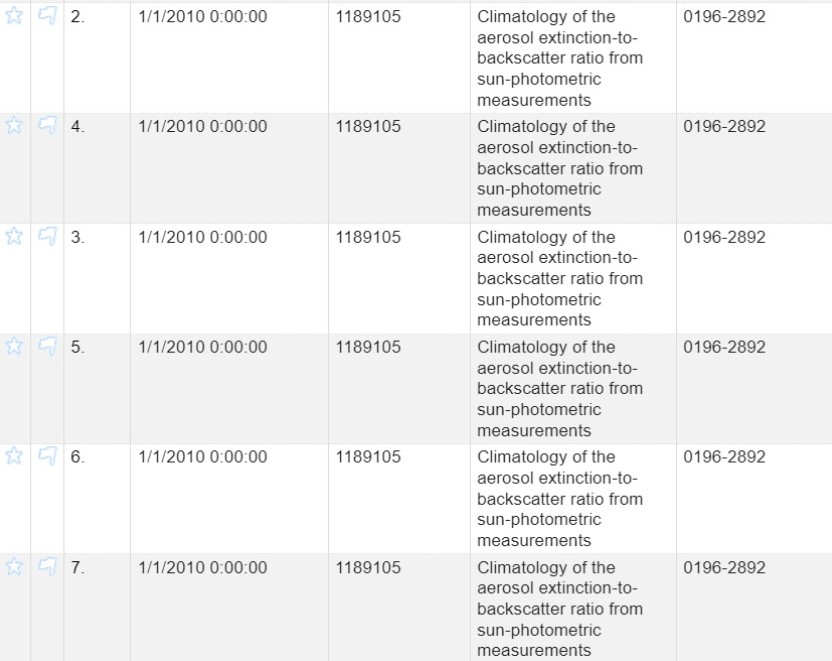
___

**Data imputation**

We now fill down columns *DEPARTAMENT UPC* and *GRUP DE RECERCA UPC* to avoid missing values in these columns. There are other columns with the same problem, like *ÀMBIT CONEIXEMENT DE LA REVISTA*, but as they will not be relevant to our task we decided to ignore them.

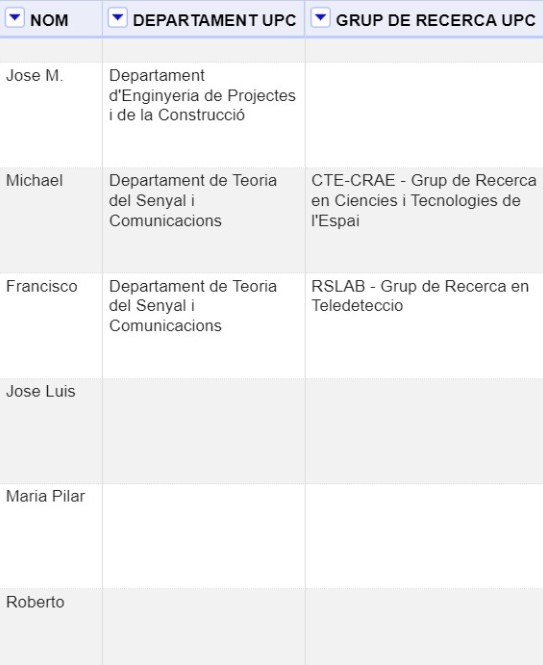
___

**Data augmentation**

Knowing each *DEPARTAMENT UPC* acronym will be useful for our task, so we will now create a column to store them. For that, we select *Add column based on this column...* in *DEPARTAMENT UPC* and apply the following code. 

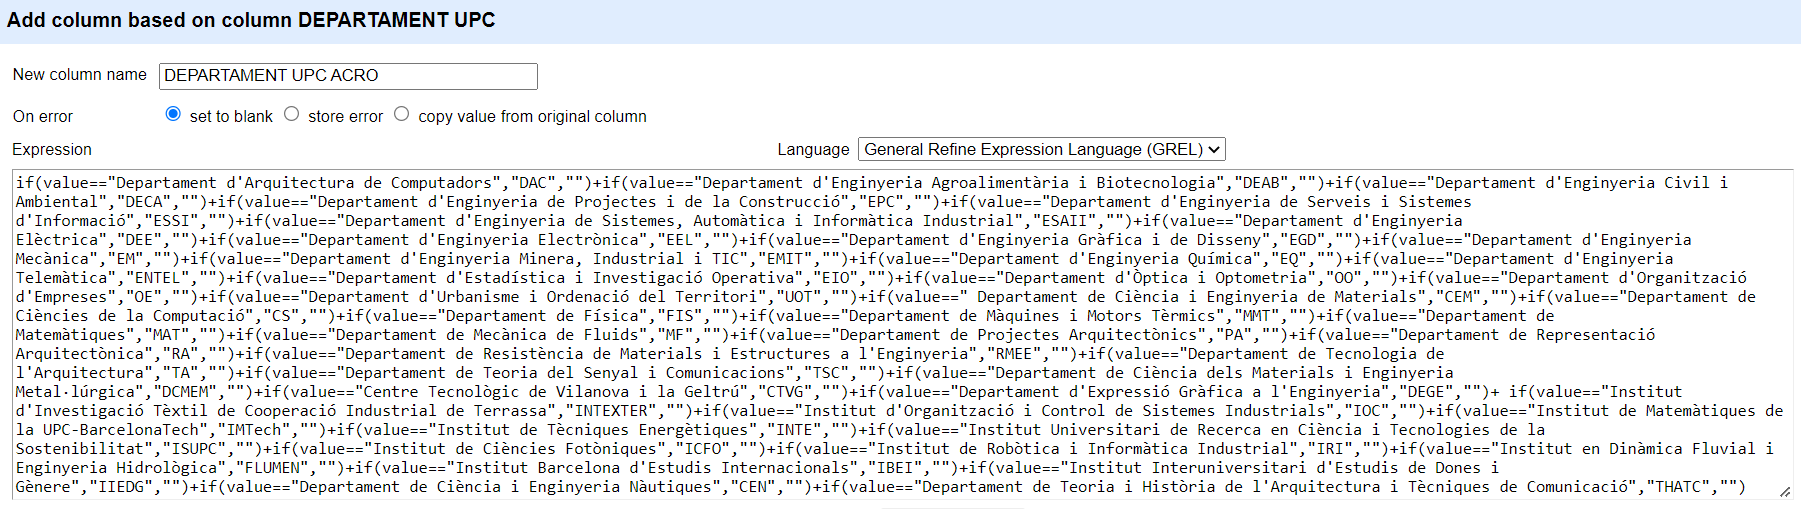

If we observe this new column, we can see that there are 345 blank values. These represent papers that are not published by recognised departments from UPC and, taking into account that the number of papers published for each one is very low, their rows can be deleted. So we select *Blank values per column* in the *Facet* option of the *All* column, mark the acronyms column and select *Remove matching rows* from *Edit rows* in the *All* column to finally remove them.

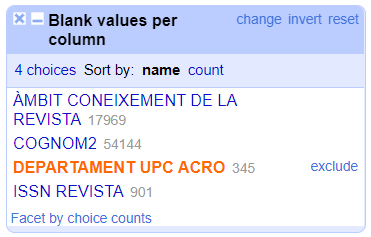

Finally, we export the *.csv* file separated by ','.

___


### 0.2. Python importation and Preprocessing

As the visualizations are done with *Altair* (a *Python* library) we need to import the *.csv* file generated with *Openrefine*. First, we declare some libraries. We also delete the upper bound of *Altair* entries to be able to plot some large graphics.

In [1]:
#IMPORTS
import pandas as pd
import altair as alt
import os
alt.data_transformers.disable_max_rows() #we delete the upper bound of entries in altair

DataTransformerRegistry.enable('default')

Now, we import the *.csv* file using the current local system.

In [2]:
archive_path = str(os.getcwd())
df = pd.read_csv (archive_path+'\\processed-data.csv') # we read the csv from our drive and we store it as a Pandas df

Now we print the head of this dataframe to see if everything is correctly imported.

In [3]:
df.head()

,DATA PUBLICACIO,ID_ARTICLE,TITOL ARTICLE,ISSN REVISTA,TITOL REVISTA,ÀMBIT CONEIXEMENT DE LA REVISTA,ID_AUTOR,COGNOM1,COGNOM2,NOM,DEPARTAMENT UPC,DEPARTAMENT UPC ACRO,GRUP DE RECERCA UPC
0,1/1/2010 0:00:00,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,178661,Alonso,Perez de Agreda,Eduardo,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques
1,1/1/2010 0:00:00,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,182365,Pinyol,Puigmarti,Nuria Merce,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques
2,1/1/2010 0:00:00,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181357,Domingo,Aladren,Maria Del Carmen,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...
3,1/1/2010 0:00:00,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181525,Remondo,Bueno,David,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...
4,1/1/2010 0:00:00,667189,Ergonomic design applied in a sugar mill inter...,0327-0793,Latin american applied research,Chemical Engineering (miscellaneous),182646,Amante,Garcia,Beatriz,Departament d'Enginyeria de Projectes i de la ...,EPC,ENMA - Enginyeria del Medi Ambient


Afterwards, we check that the types of data in the columns are correct.

In [4]:
print(df.columns)
print(df.dtypes)

Index(['DATA PUBLICACIO', 'ID_ARTICLE', 'TITOL ARTICLE', 'ISSN REVISTA',
       'TITOL REVISTA', 'ÀMBIT CONEIXEMENT DE LA REVISTA', 'ID_AUTOR',
       'COGNOM1', 'COGNOM2', 'NOM', 'DEPARTAMENT UPC', 'DEPARTAMENT UPC ACRO',
       'GRUP DE RECERCA UPC'],
      dtype='object')
DATA PUBLICACIO                    object
ID_ARTICLE                          int64
TITOL ARTICLE                      object
ISSN REVISTA                       object
TITOL REVISTA                      object
ÀMBIT CONEIXEMENT DE LA REVISTA    object
ID_AUTOR                            int64
COGNOM1                            object
COGNOM2                            object
NOM                                object
DEPARTAMENT UPC                    object
DEPARTAMENT UPC ACRO               object
GRUP DE RECERCA UPC                object
dtype: object


We can observe that some of them are not correctly imported, so we apply a type conversion for them.

In [5]:
df['DATA PUBLICACIO'] = pd.to_datetime(df['DATA PUBLICACIO'])
df['ID_ARTICLE'] = df['ID_ARTICLE'].astype('int64')
df['TITOL ARTICLE'] = df['TITOL ARTICLE'].astype('string')
df['ISSN REVISTA'] = df['ISSN REVISTA'].astype('string')
df['TITOL REVISTA'] = df['TITOL REVISTA'].astype('string')
df['ÀMBIT CONEIXEMENT DE LA REVISTA'] = df['ÀMBIT CONEIXEMENT DE LA REVISTA'].astype('category')
df['ID_AUTOR'] = df['ID_AUTOR'].astype('int64')
df['COGNOM1'] = df['COGNOM1'].astype('string')
df['COGNOM2'] = df['COGNOM2'].astype('string')
df['NOM'] = df['NOM'].astype('string')
df['DEPARTAMENT UPC'] = df['DEPARTAMENT UPC'].astype('category')
df['DEPARTAMENT UPC ACRO'] = df['DEPARTAMENT UPC ACRO'].astype('category')
df['GRUP DE RECERCA UPC'] = df['GRUP DE RECERCA UPC'].astype('category')

Now they are all well imported.

In [6]:
print(df.dtypes)

DATA PUBLICACIO                    datetime64[ns]
ID_ARTICLE                                  int64
TITOL ARTICLE                              string
ISSN REVISTA                               string
TITOL REVISTA                              string
ÀMBIT CONEIXEMENT DE LA REVISTA          category
ID_AUTOR                                    int64
COGNOM1                                    string
COGNOM2                                    string
NOM                                        string
DEPARTAMENT UPC                          category
DEPARTAMENT UPC ACRO                     category
GRUP DE RECERCA UPC                      category
dtype: object


We take a general journal area of research as we have too many and for some needed visualizations it could generate big cluttering or large graphics. To improve the visualization effectiveness we will apply a *Scopus* topic classification, from the total options of the dataframe. First, we will see all possible journal topics:

In [7]:
df_journal_area_of_research = df.drop_duplicates(subset=['ÀMBIT CONEIXEMENT DE LA REVISTA'], keep='last').reset_index()
df_journal_area_of_research = df_journal_area_of_research[['ÀMBIT CONEIXEMENT DE LA REVISTA']]
print ("The total number of possible journal areas of research is",len(df_journal_area_of_research))
print(list(df_journal_area_of_research['ÀMBIT CONEIXEMENT DE LA REVISTA'])[0:5])
 

The total number of possible journal areas of research is 259
['Public Administration', 'Nature and Landscape Conservation', 'Immunology and Microbiology  (miscellaneous)', 'Biological Psychiatry', 'Otorhinolaryngology']


Now we will classify these into the reference *Scopus* classification. This is partially a personal division, as many topics are related to many at once. But we tried to follow the following criteria.

We tried to make the most divisive division unless we have both or various fields involved in a topic into general topics. So we could not make a disjoint division of the document space (that is reasonable as many documents could talk about many topics at once, for example, *Pediatrics* and *Psychology*). Nevertheless, we make a clear separation between engineering and science. And finally, when having two similar topics about *Medicine* and *Biology* (very related topics), we take *Medicine* as the discipline related to humans and *Biology* for general knowledge. 

Bellow, we can see the general topics that *Scopus* has. And after that, the division of UPC topics according to that criteria.

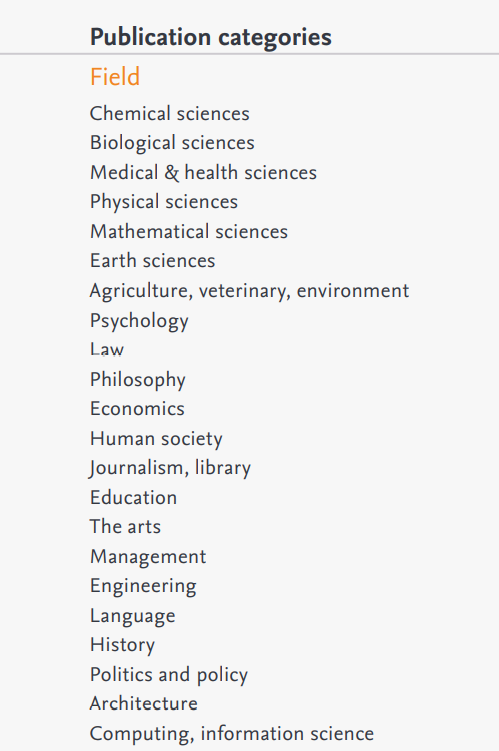

In [8]:
chemical_sciences = ['Fuel Technology', 'Electrochemistry', 'Catalysis', 
                     'Chemistry  (miscellaneous)', 'Organic Chemistry', 
                     'Metals and Alloys', 'Analytical Chemistry', 
                     'Polymers and Plastics', 'Inorganic Chemistry', 
                     'Physical and Theoretical Chemistry', 'Materials Chemistry', 
                     'Biochemistry', 'Ceramics and Composites', 'Spectroscopy',
                     'Biomaterials', 'Surfaces and Interfaces', 
                     'Water Science and Technology', 'Surfaces, Coatings and Films',
                     'Process Chemistry and Technology', 'Instrumentation']
biological_sciences = ['Biological Psychiatry', 'Virology', 'Paleontology',
                       'Immunology and Microbiology  (miscellaneous)', 'Molecular Biology',
                       'Microbiology', 'Epidemiology', 'Applied Microbiology and Biotechnology', 
                       'Drug Discovery', 'Genetics', 'Cellular and Molecular Neuroscience', 
                       'Clinical Biochemistry', 'Cell Biology', 'Developmental Biology', 'Parasitology',
                       'Pathology and Forensic Medicine', 'Toxicology',
                       'Pharmacology, Toxicology and Pharmaceutics  (miscellaneous)',
                       'Anatomy', 'Immunology and Allergy', 'Infectious Diseases',
                       'Structural Biology', 'Neuroscience  (miscellaneous)',
                       'Biochemistry, Genetics and Molecular Biology  (miscellaneous)',
                       'Cognitive Neuroscience', 'Biophysics']
medical_health_sciences = ['Otorhinolaryngology', 'Histology', 'Periodontics', 
                           'Anesthesiology and Pain Medicine', 
                           'Complementary and Alternative Medicine', 'Microbiology (medical)',
                           'Embryology', 'Oral Surgery', 'Gastroenterology', 'Endocrine and Autonomic Systems',
                           'Advanced and Specialized Nursing', 'Internal Medicine', 'Hepatology',
                           'Nursing  (miscellaneous)', 'Biochemistry (medical)', 'Molecular Medicine', 
                           'Endocrinology', 'Medical Laboratory Technology', 'Dentistry  (miscellaneous)',
                           'Hematology', 'Cancer Research', 'Oncology', 'Endocrinology, Diabetes and Metabolism',
                           'Pharmacology (medical)', 'Sports Science', 'Nutrition and Dietetics', 'Dermatology',
                           'Immunology', 'Sensory Systems', 'Obstetrics and Gynecology',
                           'Medicine  (miscellaneous)', 'Rheumatology', 'Transplantation', 
                           'Optometry', 'Rehabilitation', 'Cardiology and Cardiovascular Medicine',
                           'Neurology (clinical)', 'Surgery', 'Physiology', 'Emergency Medicine',
                           'Radiology, Nuclear Medicine and Imaging', 'Ophthalmology',
                           'Critical Care and Intensive Care Medicine', 'Pulmonary and Respiratory Medicine',
                           'Food Science', 'Pharmacology', 'Neurology', 
                           'Physical Therapy, Sports Therapy and Rehabilitation', 
                           'Pediatrics, Perinatology and Child Health', 'Pharmaceutical Science',
                           'Orthopedics and Sports Medicine', 'Health, Toxicology and Mutagenesis']
physical_sciences = ['Mathematical Physics', 'Energy  (miscellaneous)', 'Atmospheric Science',
                     'Radiation', 'Space and Planetary Science', 'Psychiatry and Mental Health',
                     'Atomic and Molecular Physics, and Optics', 'Acoustics and Ultrasonics', 
                     'Physical and Theoretical Chemistry', 
                     'Earth and Planetary Sciences  (miscellaneous)', 'Condensed Matter Physics',
                     'Aquatic Science', 'Astronomy and Astrophysics', 
                     'Physics and Astronomy (miscellaneous)', 'Nuclear and High Energy Physics',
                     'Fluid Flow and Transfer Processes', 'Statistical and Nonlinear Physics',
                     'Mechanics of Materials', 'Materials Science (miscellaneous)']
mathematical_sciences = ['Numerical Analysis', 'Logic', 'Algebra and Number Theory',
                         'Geometry and Topology', 'Statistics, Probability and Uncertainty',
                         'Discrete Mathematics and Combinatorics', 'Mathematics  (miscellaneous)',
                         'Statistics and Probability', 'Applied Mathematics', 
                         'Computational Theory and Mathematics']
earth_science = ['Stratigraphy', 'Geophysics', 'Earth-Surface Processes', 'Geology',
                 'Geochemistry and Petrology', 'Geography, Planning and Development'] 
agriculture_veterinary_environment = ['Insect Science','Nature and Landscape Conservation',
                                      'Ecological Modeling', 'Filtration and Separation',
                                      'Horticulture', 'Archeology', 'Oceanography',
                                      'Veterinary  (miscellaneous)', 'Animal Science and Zoology',
                                      'Forestry', 'Global and Planetary Change', 
                                      'Waste Management and Disposal', 'Plant Science',
                                      'Renewable Energy, Sustainability and the Environment',
                                      'Agricultural and Biological Sciences  (miscellaneous)',
                                      'Agronomy and Crop Science', 'Environmental Science  (miscellaneous)',
                                      'Pollution', 'Soil Science', 'Ecology', 'Environmental Engineering',
                                      'Environmental Chemistry', 'Ecology, Evolution, Behavior and Systematics']
phychology = ['Developmental and Educational Psychology', 'Behavioral Neuroscience', 
              'Clinical Psychology', 'Decision Sciences  (miscellaneous)',
              'Neuropsychology and Physiological Psychology', 'Applied Psychology',
              'Experimental and Cognitive Psychology', 'Social Psychology', 
              'Psychology  (miscellaneous)']
law = ['Management, Monitoring, Policy and Law', 'Law']
philosophy = ['Philosophy','History and Philosophy of Science']
economics = ['Demography', 'Finance', 'Business and International Management',
             'Economic Geology', 'Economics and Econometrics',
             'Economics, Econometrics and Finance  (miscellaneous)', 
             'Accounting']
human_society = ['Human Factors and Ergonomics', 'Family Practice' ,'Gender Studies',
                 'Marketing', 'Anthropology', 'Aging', 'Human-Computer Interaction',
                 'Social Sciences (miscellaneous)', 'Health (Social Science)',
                 'Geriatrics and Gerontology']
journalism = ['Communication']
education = ['E-learning', 'Education']
arts = ['Music', 'Archeology (arts and humanities)', 'Arts and Humanities  (miscellaneous)',
        'Visual Arts and Performing Arts']
management = ['Industrial Relations','Organizational Behavior and Human Resource Management', 
              'Leadership and Management', 'Control and Optimization', 
              'Safety, Risk, Reliability and Quality', 'Strategy and Management', 
              'Transportation', 'Development', 
              'Business, Management and Accounting  (miscellaneous)',
              'Management of Technology and Innovation', 'Safety Research', 
              'Management Science and Operations Research', 'Analysis',
              'Health Information Management', 'Computers in Earth Sciences']
engineering = ['Nanoscience and Nanotechnology', 'Ocean Engineering', 'Automotive Engineering',
               'Mechanical Engineering', 'Radiological and Ultrasound Technology',
               'Aerospace Engineering', 'Electronic, Optical and Magnetic Materials',
               'Nuclear Energy and Engineering', 'Signal Processing', 'Bioengineering',
               'Biotechnology', 'Engineering  (miscellaneous)', 
               'Electrical and Electronic Engineering', 'Industrial and Manufacturing Engineering',
               'Media Technology', 'Geotechnical Engineering and Engineering Geology',
               'Biomedical Engineering', 'Health Informatics', 'Chemical Engineering  (miscellaneous)',
               'Control and Systems Engineering', 'Environmental Engineering',
               'Energy Engineering and Power Technology']
language = ['Literature and Literary Theory', 'Linguistics and Language']
history = ['History', 'Conservation', 'History and Philosophy of Science']
politics_and_policy = ['Public Administration', 'Sociology and Political Science',
                       'Tourism, Leisure and Hospitality Management', 
                       'Health Policy', 'Public Health, Environmental and Occupational Health']
architecture = ['Building and Construction', 'Architecture', 'Civil and Structural Engineering',
                'Urban Studies']
computing_information_science = ['Information Systems and Management', 
                                 'Library and Information Sciences',
                                 'Computational Mathematics', 
                                 'Computer Graphics and Computer-Aided Design',
                                 'Software', 'Computer Science Applications',
                                 'Artificial Intelligence', 'Computational Mechanics',
                                 'Modeling and Simulation', 'Computer Networks and Communications',
                                 'Theoretical Computer Science', 'Computer Science  (miscellaneous)',
                                 'Information Systems', 'Management Information Systems', 
                                 'Hardware and Architecture', 'Computational Theory and Mathematics']
other = ['NaN', 'Multidisciplinary']

#We store all topics into a general one
Scopus_topics = [chemical_sciences, biological_sciences, medical_health_sciences, 
                 physical_sciences, mathematical_sciences, earth_science, 
                 agriculture_veterinary_environment, phychology, law, philosophy,
                 economics, human_society, journalism, education, arts, management, 
                 engineering, language, history,politics_and_policy, architecture, 
                 computing_information_science,other] 
Scopus_topics_names = ['Chemical Sciences', 'Biological Sciences', 'Medical Health Sciences', 
                 'Physical Sciences', 'Mathematical Sciences', 'Earth Science', 
                 'Agriculture, Veterinary and Environment', 'Phychology', 'Law', 'Philosophy',
                 'Economics', 'Human Society', 'Journalism', 'Education', 'Arts', 'Management', 
                 'Engineering', 'Language', 'History','Politics and Policy', 'Architecture', 
                 'Computing Information Science','Other']

Now we add them to the general dataset. Keep in mind that in cases where a UPC topic has two assigned *Scopus* topics we will introduce two entries.

In [9]:
#We will use two lists to store the relations between UPC topics and Scopus.
UPC_topics_list = []
Scopus_topics_list = [] 
for i in range(len(Scopus_topics)):
  UPC_topics_list = UPC_topics_list + Scopus_topics[i]
  Scopus_topics_list = Scopus_topics_list + ([Scopus_topics_names[i]]*len(Scopus_topics[i]))

lookup = {'ÀMBIT CONEIXEMENT DE LA REVISTA': UPC_topics_list, 'SCOPUS JOURNAL TOPICS': Scopus_topics_list}
df_lookup_Scopus = pd.DataFrame(data=lookup)
df_lookup_Scopus.head()

,ÀMBIT CONEIXEMENT DE LA REVISTA,SCOPUS JOURNAL TOPICS
0,Fuel Technology,Chemical Sciences
1,Electrochemistry,Chemical Sciences
2,Catalysis,Chemical Sciences
3,Chemistry (miscellaneous),Chemical Sciences
4,Organic Chemistry,Chemical Sciences


We merge this dataframe with the original one.

In [10]:
df = pd.merge(df, df_lookup_Scopus, how='left', on = 'ÀMBIT CONEIXEMENT DE LA REVISTA')
df.head()

,DATA PUBLICACIO,ID_ARTICLE,TITOL ARTICLE,ISSN REVISTA,TITOL REVISTA,ÀMBIT CONEIXEMENT DE LA REVISTA,ID_AUTOR,COGNOM1,COGNOM2,NOM,DEPARTAMENT UPC,DEPARTAMENT UPC ACRO,GRUP DE RECERCA UPC,SCOPUS JOURNAL TOPICS
0,2010-01-01,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,178661,Alonso,Perez de Agreda,Eduardo,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques,Computing Information Science
1,2010-01-01,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,182365,Pinyol,Puigmarti,Nuria Merce,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques,Computing Information Science
2,2010-01-01,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181357,Domingo,Aladren,Maria Del Carmen,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...,Computing Information Science
3,2010-01-01,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181525,Remondo,Bueno,David,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...,Computing Information Science
4,2010-01-01,667189,Ergonomic design applied in a sugar mill inter...,0327-0793,Latin american applied research,Chemical Engineering (miscellaneous),182646,Amante,Garcia,Beatriz,Departament d'Enginyeria de Projectes i de la ...,EPC,ENMA - Enginyeria del Medi Ambient,Engineering


We said before that the topic space was not disjoint, so we would have some cases that need to put one UPC topic into two or more *Scopus* topics. We check that this is done correctly, having the same entry but making a duplicate of the information and only changing the column of *Scopus* with the various values. This will not affect other visualizations (unnecessary duplications) as in the start we make a unique clause.

So we check that the UPC topic History and Philosophy of Science is classified as History and Philosophy in Scopus topics.

In [11]:
df.query("`ÀMBIT CONEIXEMENT DE LA REVISTA` == 'History and Philosophy of Science'")

,DATA PUBLICACIO,ID_ARTICLE,TITOL ARTICLE,ISSN REVISTA,TITOL REVISTA,ÀMBIT CONEIXEMENT DE LA REVISTA,ID_AUTOR,COGNOM1,COGNOM2,NOM,DEPARTAMENT UPC,DEPARTAMENT UPC ACRO,GRUP DE RECERCA UPC,SCOPUS JOURNAL TOPICS
18283,2011-03-31,9593151,Una experiencia inolvidable,2174-9221,Metode: revista de difusio de la investigacio ...,History and Philosophy of Science,179926,Roca,Rosell,Antoni-maria Claret,Departament de Matemàtiques,MAT,MAPTHE - Analisi matricial i Teoria Discreta d...,Philosophy
18284,2011-03-31,9593151,Una experiencia inolvidable,2174-9221,Metode: revista de difusio de la investigacio ...,History and Philosophy of Science,179926,Roca,Rosell,Antoni-maria Claret,Departament de Matemàtiques,MAT,MAPTHE - Analisi matricial i Teoria Discreta d...,History
20621,2012-06-04,10398743,Mechanical writing of ferroelectric polarization,0036-8075,Science,History and Philosophy of Science,180720,Alcala,Cabrelles,Jorge,Departament de Ciència dels Materials i Enginy...,DCMEM,InSup - Grup de Recerca en Interaccio de Super...,Philosophy
20622,2012-06-04,10398743,Mechanical writing of ferroelectric polarization,0036-8075,Science,History and Philosophy of Science,180720,Alcala,Cabrelles,Jorge,Departament de Ciència dels Materials i Enginy...,DCMEM,InSup - Grup de Recerca en Interaccio de Super...,History
20623,2012-06-04,10398743,Mechanical writing of ferroelectric polarization,0036-8075,Science,History and Philosophy of Science,182977,Esque,de los Ojos,Daniel,Departament de Ciència dels Materials i Enginy...,DCMEM,InSup - Grup de Recerca en Interaccio de Super...,Philosophy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137181,2022-03-25,34021449,Tunable and giant valley-selective Hall effect...,0036-8075,Science,History and Philosophy of Science,34021533,Tan,<NA>,Cheng,Departament de Ciències de la Computació,CS,TRANSMAR - Grup de recerca de transport mariti...,History
137182,2022-03-25,34021449,Tunable and giant valley-selective Hall effect...,0036-8075,Science,History and Philosophy of Science,34021537,Torre,<NA>,Iacopo,Departament de Ciències de la Computació,CS,TRANSMAR - Grup de recerca de transport mariti...,Philosophy
137183,2022-03-25,34021449,Tunable and giant valley-selective Hall effect...,0036-8075,Science,History and Philosophy of Science,34021537,Torre,<NA>,Iacopo,Departament de Ciències de la Computació,CS,TRANSMAR - Grup de recerca de transport mariti...,History
137184,2022-03-25,34021449,Tunable and giant valley-selective Hall effect...,0036-8075,Science,History and Philosophy of Science,34021542,Song,<NA>,Justin C. W.,Departament de Ciències de la Computació,CS,TRANSMAR - Grup de recerca de transport mariti...,Philosophy


Now that everything is ready to make the visualizations, we would like to clarify the color criteria that we are going to use through the document.

First, we want to make our work useful for people with color-vision deficiency. For that, we will use sequential color scales and not diverging ones, so the gradient from dark to light can be appreciated for everybody. Furthermore, not all sequential color scales are valid. In the following picture it can be seen that there are some colors that should not be used at the same time.


Now that everything is ready to make the visualizations, we would like to clarify the color criteria that we are going to use through the document.

First, we want to make our work useful for people with color-vision deficiency. For that, we will use sequential color scales and not diverging ones, so the gradient from dark to light can be appreciated for everybody. Furthermore, not all sequential color scales are valid. In the following picture it can be seen that there are some colors that should not be used at the same time.

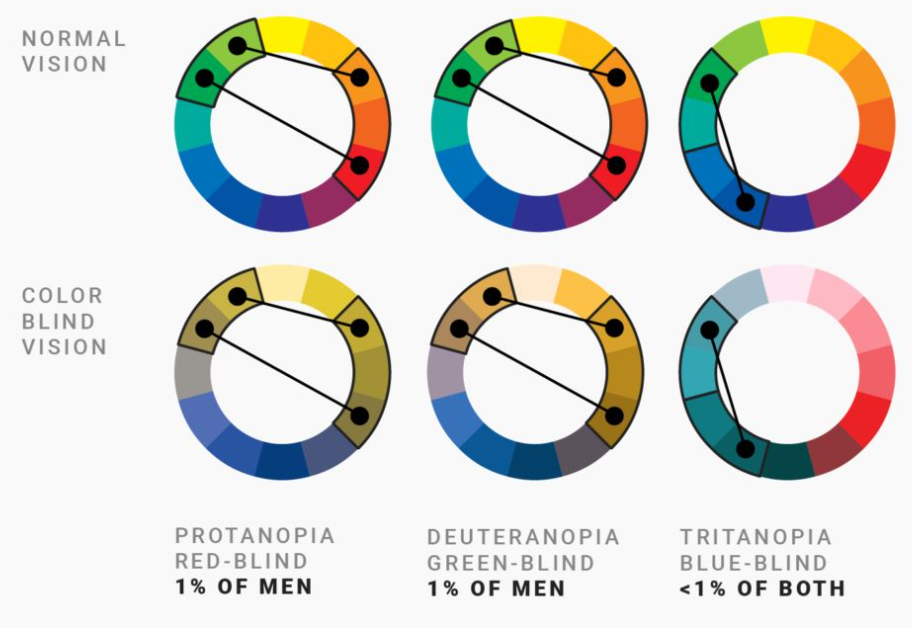



Finally, we will try to use different colors for similar visualizations with different scales to avoid confusion and also try to use the same colors throughout the document to give a feeling of unity.

With all this information precomputed we can go on and try to compute the visualizations depending on the questions that they had requested us to answer through visualizations. These are:
*   How have the different departments performed along the last years?
*   How have the different research groups performed along the last years?
*   Is there any correlation between department size and production?
*   Do any departments produce more papers per person?
*   How big is each area of research (the journal area of research in the dataset) in UPC?
*   Is there an intersection between departments and areas of research 

We will try to answer them with a single visualization for each one and explain the process applied to obtain it. 

Also, all visualizations titles will be in English to have higher reachability and not only be understood in Catalonia (even though we will leave departments and groups in the original language to avoid confusion with the translation).

We can now take a last look at the dataset and start answering all questions with effectiveness, expressiveness and appropriateness. 

In [12]:
df.head()

,DATA PUBLICACIO,ID_ARTICLE,TITOL ARTICLE,ISSN REVISTA,TITOL REVISTA,ÀMBIT CONEIXEMENT DE LA REVISTA,ID_AUTOR,COGNOM1,COGNOM2,NOM,DEPARTAMENT UPC,DEPARTAMENT UPC ACRO,GRUP DE RECERCA UPC,SCOPUS JOURNAL TOPICS
0,2010-01-01,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,178661,Alonso,Perez de Agreda,Eduardo,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques,Computing Information Science
1,2010-01-01,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,182365,Pinyol,Puigmarti,Nuria Merce,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques,Computing Information Science
2,2010-01-01,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181357,Domingo,Aladren,Maria Del Carmen,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...,Computing Information Science
3,2010-01-01,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181525,Remondo,Bueno,David,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...,Computing Information Science
4,2010-01-01,667189,Ergonomic design applied in a sugar mill inter...,0327-0793,Latin american applied research,Chemical Engineering (miscellaneous),182646,Amante,Garcia,Beatriz,Departament d'Enginyeria de Projectes i de la ...,EPC,ENMA - Enginyeria del Medi Ambient,Engineering


# Exercise 1
The main question is: 
*   How have the different departments performed along the last years?

We need to observe the number of papers published by each department for the last few years. For that reason, papers will be grouped by department and year.

## Exercice 1.1: Previous calculations
Before making the visualization, we need to extract the years from the publication date and add this information to the dataframe.

In [13]:
df1 = df
years = []
for date in df['DATA PUBLICACIO']:
  years.append(date.year)
df1['ANYS'] = years

After that, we group papers by department and year and count them, dropping duplicate values.

In [14]:
df1=df1.drop_duplicates(subset=['DEPARTAMENT UPC','ANYS','ID_ARTICLE'], keep='last').reset_index()
df1 = df1.groupby(['DEPARTAMENT UPC','ANYS'])['ID_ARTICLE'].count().reset_index(name='PUBLICACIONS')

## Exercice 1.2: Visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfil, that is to compare quantities. The problem here is the great amount of data, which can lead us to clutter. For that, using a heatmap can be a good option.

In [15]:
vis1 = alt.Chart(df1).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC:O', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'))
    ).properties (
        title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
        width = 700,
        height = 400
    )

vis1

alt.Chart(...)

From that previous visualization, we can observe some problems. The first one is the difficulty to read department names, so acronyms should be used. We can also observe that 2023 appears in the visualizations, when it should not, for obvious reasons. So now, we will use acronyms and delete the year 2023.

In [16]:
df1 = df
df1['ANYS'] = years
df1 = df1.loc[df1['ANYS'] <= 2022].reset_index()
df1=df1.drop_duplicates(subset=['DEPARTAMENT UPC','ANYS','ID_ARTICLE'], keep='last').reset_index()
df1 = df1.groupby(['DEPARTAMENT UPC ACRO','ANYS'])['ID_ARTICLE'].count().reset_index(name='PUBLICACIONS')

In [17]:
vis1 = alt.Chart(df1).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC ACRO:O', title='UPC Departments', axis = alt.Axis (labelAngle = 45, labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'))
).properties (
    title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
    width = 700,
    height = 400
)

vis1

alt.Chart(...)

We can observe that this visualization is correct and answers the proposed question. Nevertheless, a detailed visualization showing the information of the most relevant departments could be a good way to improve this visualization. So, we will now work on this.

In [18]:
depts = df1['DEPARTAMENT UPC ACRO']
pub = df1['PUBLICACIONS']
publicacions = []
for i in range(0,len(depts)-12,13):
  dept_pub = 0
  for j in range(i,i+13):
    dept_pub += pub[j]
  for j in range(i,i+13):
    publicacions.append(dept_pub)
detailed_df1 = df1
detailed_df1['PUBLICACIONS TOTALS'] = publicacions
detailed_df1 = detailed_df1.sort_values(['PUBLICACIONS TOTALS','ANYS'],ascending = True).groupby(['DEPARTAMENT UPC ACRO','ANYS']).head(2)
detailed_df1 = detailed_df1.tail(8*13)

In [19]:
detailed_vis1 = alt.Chart(detailed_df1).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC ACRO:O', title='Most Relevant UPC Departments', axis = alt.Axis (labelAngle = 45, labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 14, labelFontSize=12))
).properties (
    title=alt.TitleParams("Number of publications per UPC department (most relevants) during the last years",fontSize=16),
    width = 700,
    height = 400
)

detailed_vis1

alt.Chart(...)

After that, we can see that the number of publications can be a little bit better appreciated for these departments in this visualization but does not improve in a very significant way the previous visualization.

___

# Exercise 2
The main question is: 
*   How have the different research groups performed along the last years?

We need to observe the number of papers published by each research group for the last few years. For that reason, papers will be grouped by research group and year.

## Exercice 2.1: Previous calculations
Before making the visualization, we need to extract the years from the publication date (which has been already done before) and add this information to the dataframe, remembering that 2023 must not be taken into account and using acronyms.

In [20]:
df2 = df
df2['ANYS'] = years
df2=df2.drop_duplicates(subset=['GRUP DE RECERCA UPC','ANYS','ID_ARTICLE'], keep='last').reset_index()
df2 = df2.groupby(['GRUP DE RECERCA UPC','ANYS'])['ID_ARTICLE'].count().reset_index(name='PUBLICACIONS')
acronyms = []
for i in range(len(df2)):
  acronyms.append(df2['GRUP DE RECERCA UPC'][i].split()[0])
df2['GRUP DE RECERCA UPC ACRO'] = acronyms
df2 = df2.loc[df2['ANYS'] <= 2022].reset_index()

## Exercice 2.2: Visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfil, that is to compare quantities. The problem here is the great amount of data, which can lead us to clutter. For that, using a heatmap can be a good option.

In [21]:
vis2 = alt.Chart(df2).mark_rect(
    ).encode(
    x=alt.X('GRUP DE RECERCA UPC ACRO:O', title='UPC Research groups', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 14, labelFontSize=12))
    ).properties (
        title=alt.TitleParams("Number of publications per UPC research group during the last years",fontSize=16),
        width = 700,
        height = 400
    )

vis2

alt.Chart(...)

From that previous visualization, the main problem is obvious: there are too many research groups. For that, we classified the research groups in some research areas. This classification was done manually and the results were saved to a *.csv* file, which we are using to compute the new research groups. We will use different pallete here as the range is 

In [22]:
research_groups_classification = pd.read_csv (archive_path+'/grups-de-recerca.csv',encoding= 'unicode_escape',sep=',')
groups = df2['GRUP DE RECERCA UPC ACRO']
groups2 = research_groups_classification['GRUP DE RECERCA UPC']
area = research_groups_classification['ÀMBIT DE CONEIXEMENT']
areas = []

for group in groups:
  for i in range(0, len(groups2)):
    if group == groups2[i].split()[0]:
      areas.append(area[i])
df2['ÀREA DE RECERCA'] = areas
df2 = df2.groupby(['ÀREA DE RECERCA','ANYS'])['PUBLICACIONS'].mean().reset_index(name='MITJANA DE PUBLICACIONS')

In [23]:
vis2 = alt.Chart(df2).mark_rect(
    ).encode(
    x=alt.X('ÀREA DE RECERCA:O', title='UPC Research Area', axis = alt.Axis (labelAngle = 45, labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('MITJANA DE PUBLICACIONS:Q',
              title='Mean of publications',
              scale=alt.Scale(scheme="redpurple"), legend = alt.Legend(titleFontSize = 14, labelFontSize=12))
    ).properties (
        title=alt.TitleParams("Mean number of publications per UPC research area during the last years",fontSize=16),
        width = 700,
        height = 400
    )

vis2

alt.Chart(...)

We can observe that this visualization is correct and, despite not directly answering the proposed question due to the high number of research groups, it gives a good idea of how a research group can behave. 

___

# Exercise 3
The main question is: 
*   Is there any correlation between department size and production?

We need to be able to compare the size and production of each department, with no need to take the date into account or make differences between departments.

## Exercice 3.1: Previous calculations
Before making the visualization, we need to count the people and papers for every department.

In [24]:
department_size=df[['DEPARTAMENT UPC','ID_AUTOR']] #get department and maker's id
department_size=department_size.drop_duplicates(subset=['DEPARTAMENT UPC','ID_AUTOR'], keep='last') #unique values to know how many people are in every department
department_size = pd.DataFrame({'Department Size' : department_size.groupby( ['DEPARTAMENT UPC'] ).size()}).reset_index() # group by counting for each department
department_production=df[['DEPARTAMENT UPC', 'ID_ARTICLE']]
department_production=department_production.drop_duplicates(subset=['DEPARTAMENT UPC','ID_ARTICLE'], keep='last')
department_production = pd.DataFrame({'Department Production' : department_production.groupby( ['DEPARTAMENT UPC'] ).size()}).reset_index()
df3 = pd.merge(department_production, department_size, how = 'left') #join both datasets
df3 = df3.loc[df3['Department Production'] > 0].reset_index() #delete 0 values
print (df3[['Department Production','Department Size']])

    Department Production  Department Size
0                     150              526
1                    1205             2377
2                     783             1534
3                    4721             5842
4                    1902             3147
5                    1031             1309
6                     611              793
7                     537             1121
8                    2589             4167
9                     553              952
10                    645              979
11                    262              507
12                   1503             2386
13                    798             1713
14                    462              564
15                    904             1051
16                    578              473
17                    436              823
18                   1839             3345
19                    187              248
20                   1089             2004
21                   3183             5792
22         

## Exercice 3.2: Visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfil, that is to check the possible correlation between two variables. For that, using a point chart with a superposed linear regression of all values can be a good option.

In [25]:
point_chart = alt.Chart(df3).mark_circle(opacity=1, size=50, color='black').encode(
    x=alt.X('Department Size:Q', title='Department Size', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('Department Production:Q', title='Department Production', axis = alt.Axis (labelFontSize=12, titleFontSize = 14, titlePadding = 100))
).properties (
        title=alt.TitleParams("Relationship between department size and production",fontSize=16, dy = -25),
        width = 700,
        height = 400
    )

linear_regression = point_chart.transform_regression(
    'Department Size','Department Production').mark_line(color='#fd8d3c')

vis3 = point_chart + linear_regression
vis3

alt.LayerChart(...)

We can observe that this visualization is correct and answers the proposed question.

___

# Exercise 4
The main question is the following one: 
*   Do any departments produce more papers per person?

We need to have a look to how many papers are made in average for each department. As no time is asked, we will consider that they are grouped across all years. So we will do it based on the number of people are there in a department and how many papers they have done in all years, computing a ratio. This way we will be able to see clearly the answer to this question. 

## Exercise 4.1: Computing some values
First we need to compute the count of paper for each department and how many people are there, to after compute the ratio that we will show in the visualization. We will use acronyms we have precomputed before to reduce cluttering in the representation of 'DEPARTAMENT UPC', we will plot here the relations:



In [26]:
df_departments=df.drop_duplicates(subset=['DEPARTAMENT UPC','DEPARTAMENT UPC ACRO'], keep='last').reset_index()
print(df_departments[['DEPARTAMENT UPC','DEPARTAMENT UPC ACRO']])

                                      DEPARTAMENT UPC DEPARTAMENT UPC ACRO
0   Institut d'Organització i Control de Sistemes ...                  IOC
1                  Institut de Tècniques Energètiques                 INTE
2   Departament d'Enginyeria de Serveis i Sistemes...                 ESSI
3                 Departament d'Enginyeria Telemàtica                ENTEL
4             Departament de Projectes Arquitectònics                   PA
5   Institut d'Investigació Tèxtil de Cooperació I...             INTEXTER
6                   Departament d'Òptica i Optometria                   OO
7       Institut de Robòtica i Informàtica Industrial                  IRI
8   Departament d'Enginyeria de Sistemes, Automàti...                ESAII
9                  Departament d'Enginyeria Elèctrica                  DEE
10  Departament d'Urbanisme i Ordenació del Territori                  UOT
11        Departament de Representació Arquitectònica                   RA
12        Departament de 

First we will count the people for each department. We look only for distinct values of "DEPARTAMENT UPC ACRO" and "ID_AUTOR" (person that has done the article). Some papers are assigned to many people in diferent departments, so keep in mind this is not a disjoint separation of the documents. 

In [27]:
df4_count_people=df[['DEPARTAMENT UPC ACRO','ID_AUTOR']] #get department and maker's id
df4_count_people=df4_count_people.drop_duplicates(subset=['DEPARTAMENT UPC ACRO','ID_AUTOR'], keep='last') #unique values, two know for every department, how many people there is in there
df4_count_people = pd.DataFrame({'COUNT_PEOPLE' : df4_count_people.groupby( ['DEPARTAMENT UPC ACRO'] ).size()}).reset_index() # group by counting for each department

Now we count papers following the same idea as before. We keep only distinct values of department "DEPARTAMENT UPC ACRO" and "ID_ARTICLE", as some of them are made by various people. Then we group by these and count how many there are for a department. 

In [28]:
df4_count_papers=df[['DEPARTAMENT UPC ACRO', 'ID_ARTICLE']]
df4_count_papers=df4_count_papers.drop_duplicates(subset=['DEPARTAMENT UPC ACRO','ID_ARTICLE'], keep='last')
df4_count_papers = pd.DataFrame({'COUNT_PAPERS' : df4_count_papers.groupby( ['DEPARTAMENT UPC ACRO'] ).size()}).reset_index()

Now we will merge both partial datasets and plot the count of papers and people for each department. We delete the departments that have 0 value.

In [29]:
df4_complete = pd.merge(df4_count_papers, df4_count_people, how = 'left') #join both datasets
df4_complete = df4_complete.loc[df4_complete['COUNT_PAPERS'] > 0].reset_index() #delete 0 values
print (df4_complete[['DEPARTAMENT UPC ACRO','COUNT_PAPERS','COUNT_PEOPLE']])

   DEPARTAMENT UPC ACRO  COUNT_PAPERS  COUNT_PEOPLE
0                   CEN           187           248
1                    CS          1089          2004
2                  CTVG           150           526
3                   DAC          1205          2377
4                 DCMEM          1839          3345
5                  DEAB           783          1534
6                  DECA          4721          5842
7                   DEE          1031          1309
8                  DEGE           462           564
9                   EEL          1902          3147
10                  EIO           798          1713
11                   EM           611           793
12                 EMIT           537          1121
13                ENTEL           553           952
14                  EPC           645           979
15                   EQ          2589          4167
16                ESAII          1503          2386
17                 ESSI           262           507
18          

Now we will compute the ratio and store the result into the dataframe.

In [30]:
df4_complete["RATIO_PAPERS_PER_PEOPLE"] = (df4_complete["COUNT_PAPERS"] / df4_complete["COUNT_PEOPLE"])
print(df4_complete[["DEPARTAMENT UPC ACRO","RATIO_PAPERS_PER_PEOPLE"]])

   DEPARTAMENT UPC ACRO  RATIO_PAPERS_PER_PEOPLE
0                   CEN                 0.754032
1                    CS                 0.543413
2                  CTVG                 0.285171
3                   DAC                 0.506942
4                 DCMEM                 0.549776
5                  DEAB                 0.510430
6                  DECA                 0.808114
7                   DEE                 0.787624
8                  DEGE                 0.819149
9                   EEL                 0.604385
10                  EIO                 0.465849
11                   EM                 0.770492
12                 EMIT                 0.479037
13                ENTEL                 0.580882
14                  EPC                 0.658836
15                   EQ                 0.621310
16                ESAII                 0.629925
17                 ESSI                 0.516765
18                  FIS                 0.549551
19                 I

## Exercise 4.2: Making of visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfill, that is to compare quantities. That can be easilly done by the tipical bar chart with nominal values under and quantities in the vertical axis. We will also sort the bar chart alphabetically. We will see how it looks.

We will define now the title of this visualization. As we are comparing ratios, we considered to name it: "Total department paper production per people assigned to the department". We will also name the axis, takin the ratio axis as: 'Ratio paper per people'; and the UPC Department: 'UPC Department'. 

In [31]:
alt.Chart(df4_complete).mark_bar().encode(
    x=alt.X('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='x'),
    y=alt.Y('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people')
).properties (
    title="Total department paper production per people assigned to the department"
)

alt.Chart(...)

We can observe that letters are hard to read in a horizontal axis, so we will put the departments in the vertical axis and see if it looks better. We observe that the decision of taking acronyms instead of the whole name leads to less cluttering and a better identification.

In [32]:
alt.Chart(df4_complete).mark_bar().encode(
    x=alt.X('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people'),
    y=alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='y')
).properties (
    title="Total department paper production per people assigned to the department"
)

alt.Chart(...)

We can observe that now the labels of UPC department can be read better. But the sorting in alphabetical order can lead to some difficulties when comparing across departments (even though the grid lines help a little). So we will sort them by the ratio value and see if it improves.

In [33]:
alt.Chart(df4_complete).mark_bar().encode(
    x=alt.X('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people'),
    y=alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x')
).properties (
    title="Total department paper production per people assigned to the department"
)

alt.Chart(...)

Now we can see more clear how departments perform in relation to others. It can lead to some confusion at first glance due to this sorting, but it clearly improves the fulfillment of the task that we have been demanded, easilly beeing able to compare departments. So we will leave this sorting. We store this order for future charts



In [34]:
ordered_departments = list(df4_complete.sort_values(by=['RATIO_PAPERS_PER_PEOPLE'], ascending=False)['DEPARTAMENT UPC ACRO'])
print(ordered_departments)

['THATC', 'IOC', 'PA', 'UOT', 'INTEXTER', 'RA', 'MAT', 'OE', 'DEGE', 'MMT', 'DECA', 'DEE', 'EM', 'CEN', 'MF', 'TA', 'EPC', 'RMEE', 'ESAII', 'EQ', 'EEL', 'ENTEL', 'DCMEM', 'FIS', 'CS', 'OO', 'ESSI', 'DEAB', 'DAC', 'TSC', 'EMIT', 'EIO', 'IRI', 'INTE', 'CTVG']


Now we will try to improve the visualization using the most powerful channel encodings and try to apply the technique "less ink is better". At first, we will substitute areas with points (position), that is a more powerful visual channel. So we will try to make a dot plot. 

In [35]:
alt.Chart(df4_complete).mark_point(
    filled=True,
    color='black',
    opacity = 1,
).encode(
    x=alt.X('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people'),
    y=alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x')
).properties (
    title="Total department paper production per people assigned to the department"
)

alt.Chart(...)

We can observe that we have much less "ink" or pixels to represent the ratio, but for similar cases some times it is a bit hard to compare.

So we will use a lollipop chart. This way we can add the length channel also to the quantity visualization and help to quantify the difference across departments and have a more concise notion about the difference between ratios (with the use of the x-axis grid layering). We also show the general color we have chosen for the line and a black dot:

In [36]:
points = alt.Chart(df4_complete).mark_point(
    filled=True,
    color='black',
    opacity = 1,
).encode(
    x=alt.X('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people'),
    y=alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x')
).properties (
    title = "Total department paper production per people assigned to the department",
)

lines = points.mark_rule(color='#fd8d3c', opacity = 1, strokeWidth=2).encode(
    alt.X('RATIO_PAPERS_PER_PEOPLE:Q'),
    
)
vis4 = lines + points
vis4

alt.LayerChart(...)

This clearly ahs helped with the visualization, and we will leave it. Now we will try to reduce the visualization size without having much cluttering. 

In [37]:
vis4.properties(
    height=350,
    width=350
).configure_title(
    fontSize=14,
    dy=-17,
).configure_axisY(
    titleFontWeight = 'bold',
    labelFontSize=8
).configure_axisX(
    titleFontWeight = 'bold',
)

alt.LayerChart(...)

We will change the axis order for the multipleview, and have more similarities

In [38]:
title = alt.TitleParams("Total department paper production per people assigned to the department", fontSize=16, anchor='middle', dy= -25)
points = alt.Chart(df4_complete).mark_point(
    filled=True,
    color='black',
    opacity = 1,
).encode(
    y=alt.Y('RATIO_PAPERS_PER_PEOPLE:Q', title='Ratio paper per people', axis = alt.Axis (labelFontSize=12, titleFontSize = 14, titlePadding= 100)),
    x=alt.X('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-y', axis = alt.Axis (labelAngle = 45, labelFontSize=12, titleFontSize = 14))
).properties (
    title = title,
)

lines = points.mark_rule(color='#fd8d3c', opacity = 1, strokeWidth=3).encode(
    alt.Y('RATIO_PAPERS_PER_PEOPLE:Q'),
    
)
vis4 = lines + points
vis4

alt.LayerChart(...)

___

# Exercise 5

The main question is the following one: 
*   How big is each area of research (the journal area of research in the dataset) in UPC?

We need to have know how big is an area of research (talking about paper production, not people involved). In order to reduce clutter we will use Scopus division, this way we can reduce the visualization size, and group by interesting topics and see more clear information.



## Exercise 5.1: Computing some values
First we need to compute the count of papers for each Scopus topic. So first we will import all articles and its topics and filter off the repeated cases. We will also delete some uninspecified cases if they appear.

After that we need to join the Scopus classification with the UPC topics and count based on Scopus classification finally. 

In [39]:
df5=df[['ID_ARTICLE', 'SCOPUS JOURNAL TOPICS']]
df5=df5.drop_duplicates(subset=['ID_ARTICLE', 'SCOPUS JOURNAL TOPICS'], keep='last').reset_index() #unique values, two know for every department, how many people
df5 = df5[~pd.isnull(df5['SCOPUS JOURNAL TOPICS'])]
df5 = pd.DataFrame({'COUNT_PAPERS' : df5.groupby( ['SCOPUS JOURNAL TOPICS'] ).size()}).reset_index() #group by

print(df5)

                      SCOPUS JOURNAL TOPICS  COUNT_PAPERS
0   Agriculture, Veterinary and Environment          1732
1                              Architecture          1577
2                                      Arts           207
3                       Biological Sciences           549
4                         Chemical Sciences          3385
5             Computing Information Science          3737
6                             Earth Science           557
7                                 Economics           183
8                                 Education           185
9                               Engineering          4721
10                                  History            56
11                            Human Society            99
12                               Journalism            17
13                                 Language           100
14                                      Law            40
15                               Management           813
16            

We can see that everything is well, and we can start with the visualizations

## Exercise 5.2: Making of visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfill, that is to compare quantities and know how big it is. That can be easilly done by the tipical bar chart, but in this caso we will start by putting nominal values in the vertical axis and quantities in x-axis, as before has worked well. We will also sort the bar chart alphabetically. We will see how it looks.

We will define now the title of this visualization. As we are comparing quantities, we considered to name it: "Total paper production per Scopus topic". We will also name the axis, taking the paper count axis as: 'Total paper count'; and the Scopus topics as: 'Scopus journal topics'. 

In [40]:
alt.Chart(df5).mark_bar().encode(
    x=alt.X('COUNT_PAPERS:Q',  title='Total paper count'),
    y=alt.Y('SCOPUS JOURNAL TOPICS:N',  title='Scopus journal topics', sort='y')
).properties(
  title="Total paper production per Scopus topic"
)

alt.Chart(...)

We can see that this works very well. So the election of taking Scopus topics instead of the Upc (258) has helped to reduce clutering and/or visualization size a lot. but to help with the comparation we will introduce the quantity sorting instead of the alphabetical order.

In [41]:
alt.Chart(df5).mark_bar().encode(
    x=alt.X('COUNT_PAPERS:Q',  title='Total paper count'),
    y=alt.Y('SCOPUS JOURNAL TOPICS:N',  title='Scopus journal topics', sort='-x')
).properties(
  title="Total paper production per Scopus topic"
)

alt.Chart(...)

We will store it for future uses:

In [42]:
ordered_scopus_topics = list(df5.sort_values(by=['COUNT_PAPERS'], ascending=False)['SCOPUS JOURNAL TOPICS'])
print(ordered_scopus_topics)

['Engineering', 'Physical Sciences', 'Computing Information Science', 'Chemical Sciences', 'Mathematical Sciences', 'Agriculture, Veterinary and Environment', 'Architecture', 'Medical Health Sciences', 'Management', 'Earth Science', 'Biological Sciences', 'Other', 'Arts', 'Education', 'Economics', 'Politics and Policy', 'Phychology', 'Language', 'Human Society', 'History', 'Law', 'Philosophy', 'Journalism']


Now we can add text at the end of the bar chart to help with the visualization of the specific value of document quantity. This would not add much clutter and will help with small bars that have few visibility, and get the exact quantity. We also add general standard color. 

In [43]:
bars=alt.Chart(df5).mark_bar(color='#fd8d3c').encode(
    x=alt.X('COUNT_PAPERS:Q',  title='Total paper count'),
    y=alt.Y('SCOPUS JOURNAL TOPICS:N',  title='Scopus journal topics', sort='-x')
).properties(
  title="Total paper production per Scopus topic"
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='COUNT_PAPERS:Q'
)
vis5 = bars + text
vis5

alt.LayerChart(...)

We will leave the visualization there, as we problably will join this visualization with the next one to make an upset diagram.
___

# Exercise 6
The main question is the following one: 
*    Is there an intersection between departments and areas of research?

We need to know for each area of research (Scopus topics as we have done before) how many departments has been producing a document related to the topics. This is basically an intersection that can be done with an upset diagram. We will take here Department acronyms as it will help to reduce 

## Exercise 6.1: Computing some values
First we need to obtain all pairs of Scopus topics and UPC departments. So we only need to import all departments and its topics and filter off the repeated cases. We will also delete some uninspecified cases if they appear.

In [44]:
df6 = df[['DEPARTAMENT UPC ACRO','SCOPUS JOURNAL TOPICS']]
df6=df6.drop_duplicates(subset=['DEPARTAMENT UPC ACRO','SCOPUS JOURNAL TOPICS'], keep='last').reset_index() #unique values
df6 = df6[~pd.isnull(df6['SCOPUS JOURNAL TOPICS'])]
print(df6)

      index DEPARTAMENT UPC ACRO          SCOPUS JOURNAL TOPICS
0      4123                  IRI                       Language
1      5220                  IRI        Medical Health Sciences
2      6405                   OO                      Education
3     10552                 INTE                  Earth Science
4     11151                 ESSI                     Journalism
..      ...                  ...                            ...
660  138862                  EIO                  Earth Science
661  138864                 DECA              Chemical Sciences
663  138890                  DAC  Computing Information Science
664  138910                DCMEM              Chemical Sciences
665  138911                DCMEM              Physical Sciences

[631 rows x 3 columns]


## Exercise 6.2: Making of visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to make the intersection through the upset diagram. So we will simply plot it.

We will define now the title of this visualization. As we are comparing intersections, we considered to name it: "Scopus topics mentioned by departments". We will also name the axis, taking the departments axis as: 'UPC Department'; and the Scopus topics as: 'Scopus journal topics'. We use general color for lines and dots.

In [45]:
vis6 = alt.Chart(df6).mark_line(point=True, size=3, color = '#fd8d3c').encode(
    x = alt.X('DEPARTAMENT UPC ACRO:N', title = 'Scopus journal topics'),
    y = alt.Y('SCOPUS JOURNAL TOPICS:N', title = 'UPC Department'),
    opacity = alt.value(1),
    detail = 'DEPARTAMENT UPC ACRO:N',
).properties(
    title = "Scopus topics mentioned by departments",
).configure_point(
    size=70,
    color = '#fd8d3c'
)
vis6

alt.Chart(...)

We can try to use black in points to give more highlight and clear visualization.

In [46]:
vis6 = alt.Chart(df6).mark_line(point=True, size=3, color = '#fd8d3c').encode(
    x = alt.X('DEPARTAMENT UPC ACRO:N', title = 'Scopus journal topics'),
    y = alt.Y('SCOPUS JOURNAL TOPICS:N', title = 'UPC Department'),
    opacity = alt.value(1),
    detail = 'DEPARTAMENT UPC ACRO:N',
).properties(
    title = "Scopus topics mentioned by departments",
).configure_point(
    size=70,
    color = 'black'
)
vis6

alt.Chart(...)

It's more elegant and visual.

##  Exercise 6.3: Multiview

We will try to join visualization 5 and 6 in a general view:

We will improve also the upset diagram by adding some grid background to help the horizontal identification. We also apply the sorting of departments of vis4 based on decreasing ratio and for Scopus topics made in vis6, based on decreasing count.

In [47]:
grid = [] # to help to identify the topics 
for i in range (0,len(ordered_scopus_topics),2):
  grid.append(ordered_scopus_topics[i])

title = alt.TitleParams("Scopus topics mentioned by departments", fontSize=16, anchor='middle', dy= -25)
vis6 = alt.Chart(df6).mark_line(point=alt.OverlayMarkDef(color="black", size=40), size=3, color = '#fd8d3c').encode(
    x = alt.X('DEPARTAMENT UPC ACRO:N', title = 'UPC Department', sort = ordered_departments,
              axis = alt.Axis (labelAngle = 45, labelFontSize=12, titleFontSize = 14)),
    y = alt.Y('SCOPUS JOURNAL TOPICS:N',  sort=ordered_scopus_topics, 
              axis=alt.Axis(grid=True, gridWidth= 15, values = grid, 
                            labelOpacity = 0, labelPadding=-150,
                            titleOpacity= 0, titlePadding=-150,
                            orient='right')),
    opacity = alt.value(1),
    detail = 'DEPARTAMENT UPC ACRO:N',
).properties(
    title = title,
    width = 700,
    height = 400
)

vis6

alt.Chart(...)

Now the bar plot of exercice five

In [48]:
title = alt.TitleParams("Total paper production per Scopus topic", fontSize=16, anchor='middle', dy = 0)
bars=alt.Chart(df5).mark_bar(color = '#fd8d3c').encode(
    x=alt.X('COUNT_PAPERS:Q',  title='Total paper count', axis = 
            alt.Axis (titleFontSize = 14, labelFontSize = 12)),
    y=alt.Y('SCOPUS JOURNAL TOPICS:N',  title='Scopus journal topics', sort='-x', 
            axis = alt.Axis (labelAlign='center', labelFontSize = 12, labelPadding = 100, 
                             titleY= -10, titleFontSize = 14, titlePadding = -87, titleAngle = 0))
).properties(
  title = title,
  width = 700,
  height = 400
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  
).encode(
    text='COUNT_PAPERS:Q'
)
vis5 = bars + text
vis5

alt.LayerChart(...)

And we join them, we can see that we use same visual channels and improve overall visual simplicity.

In [49]:
visdown=(vis6|vis5)

visdown

alt.HConcatChart(...)

___

# Final multiview
Now we join all visualizations at once. We keep in mind that DIN-A4 page with resolution 300 dpi, is around 2480 x 3508 pixels. If we add a marging of 2.5 cm for each band (590 pixels that we won't use) we are left with more less maximum at: 1890 x 2.918 pixels.

In [50]:
vis1 = vis1.properties(
    height = 400,
    width = 700,
)
vis2 = vis2.properties(
    height = 400,
    width = 700,
)
visup=alt.hconcat(vis1,vis2).resolve_scale(
    color='independent'
)
visup

alt.HConcatChart(...)

In [51]:
vis4 = vis4.properties(
    height = 400,
    width = 700,
)
vis3 = vis3.properties(
    height = 400,
    width = 700,
)
vismiddle=alt.hconcat(vis4,vis3).resolve_scale(
    color='independent'
)
vismiddle

alt.HConcatChart(...)

Now we will make full visualization:

In [52]:
vispart=alt.vconcat(visup,vismiddle).resolve_scale(
    color='independent'
)
visfull=alt.vconcat(vispart,visdown).resolve_scale(
    color='independent'
)
visfull

alt.VConcatChart(...)

From that multiview, we can see that the results are satisfactory, as the information required is given in the visualizations in a clear and organized way and the colours are suitable and adapted to people with colour-vision deficiency. So, we could conclude that the task was solved satisfactorily.

___